In [19]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.stats import linregress

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, "Student's Study Hours")

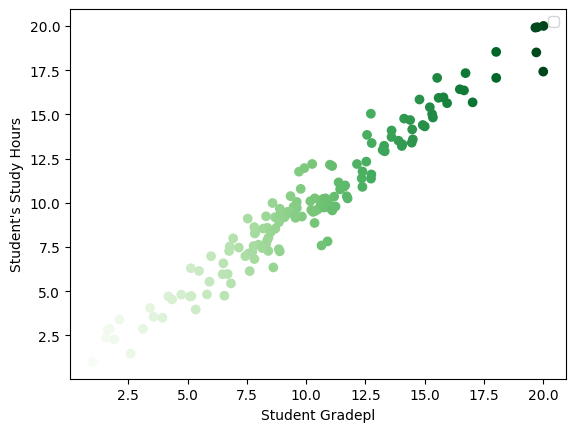

In [20]:
# Generate continous random dataset
x, y, coef = datasets.make_regression(n_samples=150, n_features=1, noise=20, coef=True, random_state=10)
x= np.interp(x, (x.min(), x.max()), (1, 20))
y= np.interp(y, (y.min(), y.max()), (1, 20))

plt.scatter(x, y, marker='o', c=x, cmap= 'Greens')
plt.legend()
plt.xlabel('Student Gradepl')
plt.ylabel("Student's Study Hours")


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

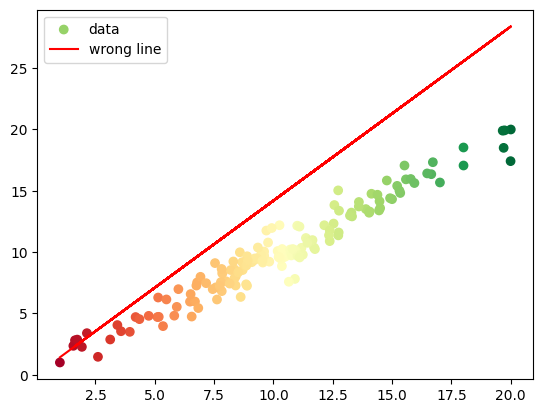

In [22]:
# Drawing some wrong red lines with a random slope
wrong_w = 1.42
plt.scatter(x, y, c=x, cmap= 'RdYlGn', label = 'data')
plt.plot(x_train, wrong_w* x_train, color = 'red', label= 'wrong line')
plt.legend()
plt.show()


In [23]:
# Drawing the correct blue line using your Object Oriented Linear Least Squares (LLS) method
class LLS:
    def __init__(self):
        ...
    def fit(self, x_train, y_train):
        w= np.matmul(np.matmul(np.linalg.inv(np.matmul(x_train.T, x_train)), x_train.T), y_train)
        return w
    def predict(self, w, x_test):
        y_pred= x_test* w
        return y_pred

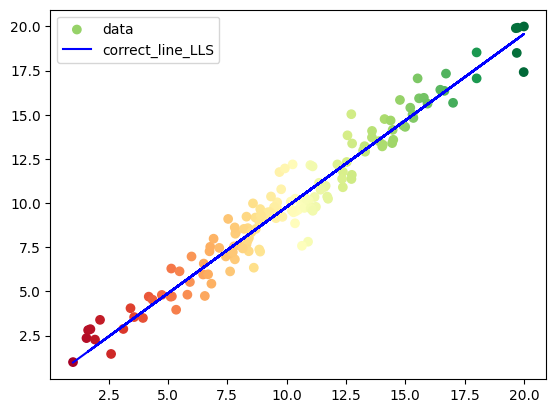

In [25]:
lls = LLS()
w= lls.fit(x_train, y_train)

plt.scatter(x, y, c=x, cmap= 'RdYlGn', label= 'data')
plt.plot(x_train, w*x_train, color= 'blue', label= 'correct_line_LLS')
plt.legend()
plt.show()

In [26]:
# Drawing a green line using linregress from scipy library
x_train_scy = x_train.reshape(-1, 1)
y_train_scy = y_train.reshape(-1, 1)

In [27]:
x_train_scy

array([[12.37286004],
       [10.36436833],
       [ 8.5834057 ],
       [11.10255296],
       [ 9.60765794],
       [ 8.88583734],
       [ 9.19712291],
       [ 7.78466166],
       [17.0139559 ],
       [ 8.30994713],
       [14.03013786],
       [12.36982247],
       [11.09569307],
       [ 5.1665667 ],
       [ 9.20973692],
       [ 8.92746161],
       [ 7.57587292],
       [16.65002444],
       [10.21570305],
       [19.99039138],
       [ 8.20027923],
       [12.73153076],
       [ 8.84697053],
       [10.75058958],
       [12.76093921],
       [15.52025857],
       [ 6.92345908],
       [ 9.69910186],
       [ 4.19079591],
       [ 7.61959133],
       [10.70364075],
       [14.91288945],
       [19.69865384],
       [ 8.70182788],
       [ 9.4710007 ],
       [ 5.92531149],
       [ 8.88988805],
       [10.49521131],
       [ 8.40512635],
       [14.469136  ],
       [10.35433584],
       [10.81632978],
       [16.71573053],
       [ 8.15314277],
       [14.38206711],
       [15

In [28]:
x_train_2= []
for i in range(len(x_train_scy)):
    x_train_2.append(x_train_scy[i][0])

x_train_2= np.array(x_train_2)
x_train_2

array([12.37286004, 10.36436833,  8.5834057 , 11.10255296,  9.60765794,
        8.88583734,  9.19712291,  7.78466166, 17.0139559 ,  8.30994713,
       14.03013786, 12.36982247, 11.09569307,  5.1665667 ,  9.20973692,
        8.92746161,  7.57587292, 16.65002444, 10.21570305, 19.99039138,
        8.20027923, 12.73153076,  8.84697053, 10.75058958, 12.76093921,
       15.52025857,  6.92345908,  9.69910186,  4.19079591,  7.61959133,
       10.70364075, 14.91288945, 19.69865384,  8.70182788,  9.4710007 ,
        5.92531149,  8.88988805, 10.49521131,  8.40512635, 14.469136  ,
       10.35433584, 10.81632978, 16.71573053,  8.15314277, 14.38206711,
       15.78436776, 11.45938712,  2.13820234, 11.00036707,  6.55390378,
       11.23640829,  9.82384491,  4.35133933,  7.99249666, 10.64711061,
       13.59949299, 11.71010995, 13.59614599, 11.59495107,  9.77148324,
       10.90525461, 18.00775878, 14.05392407, 15.21142803, 10.61171814,
        9.08484234,  6.50953722,  8.51381929,  3.11979039, 13.89

In [29]:
y_train_2 = []
for i in range(len(y_train_scy)):
    y_train_2.append(y_train_scy[i][0])

y_train_2= np.array(y_train_2)
y_train_2

array([11.77140133, 10.25222986,  9.98577634,  9.56539487,  9.70287715,
        7.25550443,  9.35348368,  7.55249235, 15.67810596,  7.65932041,
       13.21065632, 10.89871516, 12.07980652,  4.72320809,  9.48163894,
        9.38557624,  7.13012029, 16.35475588,  9.59558224, 17.41813696,
        8.54055609, 11.36530914,  7.37395682,  9.72902406, 13.37616869,
       17.06183088,  7.98567535, 11.75743536,  4.7051499 ,  6.13498699,
       10.21227956, 14.39627428, 18.50268106,  8.53860423,  9.76951147,
        5.53555715,  9.66265184,  9.62870193,  7.27665714, 14.1467077 ,
        8.85719955, 10.24919198, 17.33152733,  7.43311616, 14.67800485,
       15.9625685 , 10.9746482 ,  3.39152273, 12.15340223,  4.74492623,
        9.78930545,  9.22149234,  4.53384841,  7.62867763,  7.58375026,
       14.08706243, 10.36951593, 13.72019771, 10.91105297, 10.78463629,
       10.00905261, 17.0624561 , 13.30966501, 15.40239101,  9.8807793 ,
        9.1794941 ,  6.57738071,  8.35111387,  2.87535761, 13.50

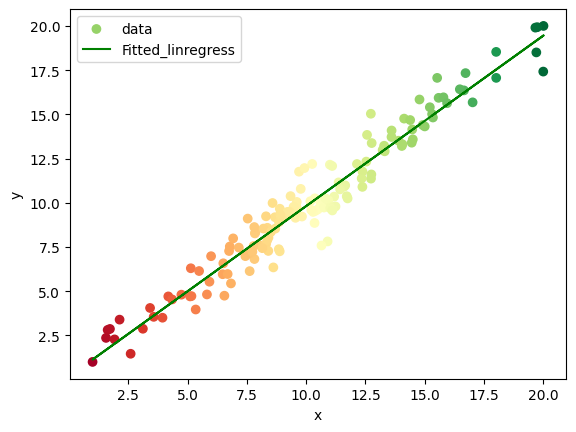

In [30]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_train_2 , y_train_2)

y_pred = intercept + slope * x
 

plt.scatter(x,y, c=x , cmap = 'RdYlGn', marker="o", label="data")
plt.plot(x,y_pred, color="green", label="Fitted_linregress")
plt.legend(loc='best')
plt.xlabel('x') 
plt.ylabel('y')
plt.show()


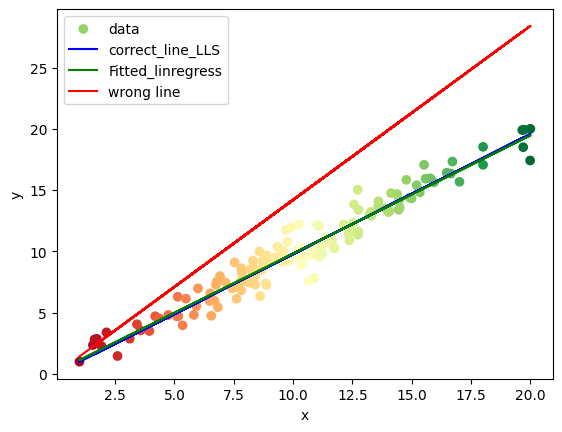

In [31]:
plt.scatter(x,y, c=x , cmap = 'RdYlGn', marker="o", label="data")
plt.plot(x_train , w * x_train , color="blue" , label="correct_line_LLS")
plt.plot(x,y_pred, color="green", label="Fitted_linregress")
plt.plot(x_train , wrong_w * x_train , color="red" , label="wrong line")
plt.legend(loc='best')
plt.xlabel('x') 
plt.ylabel('y')
plt.show()